In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "FloresNativas-sin-modificaciones/train"
validation_path = "FloresNativas-sin-modificaciones/valid"
test_path = "FloresNativas-sin-modificaciones/test"
image_categories = os.listdir('FloresNativas-sin-modificaciones/train')

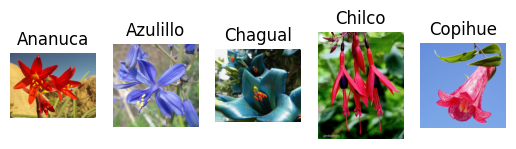

In [3]:
def plot_images(image_categories):

 # Create a figure
 plt.figure(figsize=(10, 10))
for i, cat in enumerate(image_categories):

 # Load images for the ith category

    image_path = train_path + '/' + cat
    images_in_folder = os.listdir(image_path)
    first_image_of_folder = images_in_folder[0]
    first_image_path = image_path + '/' + first_image_of_folder
    img = tf.keras.utils.load_img(first_image_path)
    img_arr = tf.keras.utils.img_to_array(img)/255.0


 # Create Subplot and plot the images
    plt.subplot(1, 5, i+1)
    plt.imshow(img_arr)
    plt.title(cat)
    plt.axis('off')

plt.show()

In [4]:
plot_images(image_categories)

<Figure size 1000x1000 with 0 Axes>

In [5]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
 train_path,
 target_size=(150, 150),
 batch_size=25,
 class_mode='categorical')

Found 1925 images belonging to 5 classes.


In [6]:
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
 validation_path,
 target_size=(150, 150),
 batch_size=25,
 class_mode='categorical')

Found 550 images belonging to 5 classes.


In [7]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
 test_path,
 target_size=(150, 150),
 batch_size=5,
 class_mode='categorical')

Found 275 images belonging to 5 classes.


In [8]:
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Ananuca', 1: 'Azulillo', 2: 'Chagual', 3: 'Chilco', 4: 'Copihue'}


In [9]:
model = Sequential() # model object

In [10]:
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu',
input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [14]:
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator,
                 epochs=10,
                 verbose=1, 
                 validation_data=val_image_generator,
                 steps_per_epoch = 1925//30,
                 validation_steps = 550//30,
                 callbacks=early_stopping)

Epoch 1/10
64/64 [==============================] - 26s 400ms/step - loss: 1.1940 - accuracy: 0.5575 - val_loss: 0.5741 - val_accuracy: 0.8244
Epoch 2/10
64/64 [==============================] - 22s 336ms/step - loss: 0.4664 - accuracy: 0.8156 - val_loss: 0.5158 - val_accuracy: 0.7889
Epoch 3/10
64/64 [==============================] - 21s 332ms/step - loss: 0.3405 - accuracy: 0.8800 - val_loss: 0.4094 - val_accuracy: 0.8378
Epoch 4/10
64/64 [==============================] - 21s 330ms/step - loss: 0.2859 - accuracy: 0.9000 - val_loss: 0.3572 - val_accuracy: 0.8822
Epoch 5/10
64/64 [==============================] - 21s 331ms/step - loss: 0.1815 - accuracy: 0.9325 - val_loss: 0.3068 - val_accuracy: 0.8978
Epoch 6/10
64/64 [==============================] - 21s 334ms/step - loss: 0.1752 - accuracy: 0.9375 - val_loss: 0.3517 - val_accuracy: 0.8778
Epoch 7/10
64/64 [==============================] - 21s 328ms/step - loss: 0.1232 - accuracy: 0.9544 - val_loss: 0.3663 - val_accuracy: 0.8978

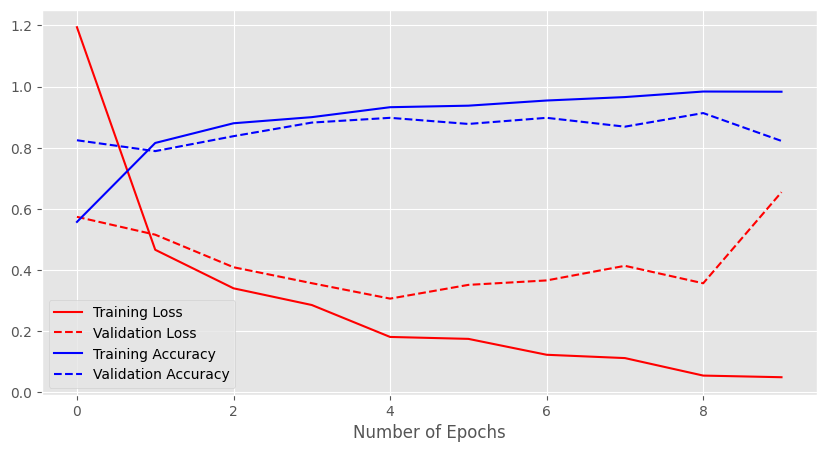

In [15]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [16]:
model.evaluate(test_image_generator)

55/55 [==============================] - 2s 42ms/step - loss: 0.5659 - accuracy: 0.8473


[0.565926194190979, 0.8472727537155151]

1/1 [==============================] - 0s 52ms/step


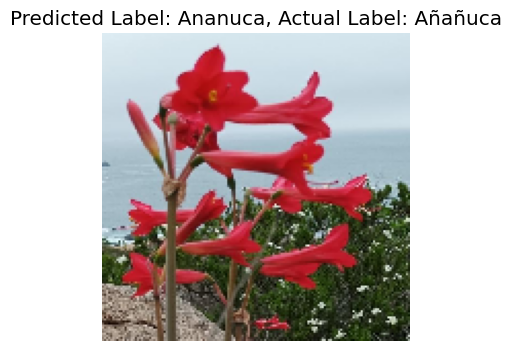

In [18]:
test_image_path = 'FloresNativas-sin-modificaciones/test/Ananuca/Screenshot_417_png.rf.00209ab040fc4cce2d980453c295eaca.jpg'
def generate_predictions(test_image_path, actual_label):
    
    #load and preprocess the image
    test_img = tf.keras.utils.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = tf.keras.utils.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1],test_img_arr.shape[2]))
    
    #Make predictions
    predicted_label = np.argmax(model.predict(test_img_input)) 
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()   
    
#Call the function
generate_predictions(test_image_path, actual_label='Añañuca') 